<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [337]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [338]:
# Load the data
house = pd.read_csv('./housing.csv')

# Looking for the first 5 rows of the data
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [339]:
# There are 1460 rows and 81 columns in the dataframe
house.shape

(1460, 81)

In [340]:
# Looking for the columns
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [341]:
# Checking for the types of different features in the data
house.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [342]:
# Checking for the summary statistics to understand about the features
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [343]:
# Checking for residential houses
house['MSZoning'].sort_values().value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [344]:
# Removing any houses that are not residential from the dataset
house = house[house.MSZoning.str.startswith(('R','F'))]

In [345]:
# Checking for unique elements in each of the object columns
# ref https://www.kaggle.com/plasticgrammer/house-prices-training
n = house.select_dtypes(include=object)
for c in n.columns:
    print(c, ': ', house[c].unique())

MSZoning :  ['RL' 'RM' 'FV' 'RH']
Street :  ['Pave' 'Grvl']
Alley :  [nan 'Grvl' 'Pave']
LotShape :  ['Reg' 'IR1' 'IR2' 'IR3']
LandContour :  ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :  ['AllPub' 'NoSeWa']
LotConfig :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope :  ['Gtl' 'Mod' 'Sev']
Neighborhood :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 :  ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 :  ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType :  ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle :  ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle :  ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl :  ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile

In [346]:
# Checking for unique elements in each of the numeric columns
n = house.select_dtypes(exclude=object)
for c in n.columns:
    print(c, ': ', house[c].unique())

Id :  [   1    2    3 ... 1458 1459 1460]
MSSubClass :  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
LotFrontage :  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
  73.  77.  64.  94. 105.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea :  [ 8450  9600 11250 ... 17217 13175  9717]
OverallQual :  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond :  [5 8 6 7 4 3 9 2 1]
YearBuilt :  [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1966 1959
 1994 1954 19

In [347]:
# Looking for nulls
house.isnull().sum().sort_values(ascending=False)

PoolQC           1443
MiscFeature      1398
Alley            1361
Fence            1172
FireplaceQu       681
LotFrontage       259
GarageCond         79
GarageType         79
GarageYrBlt        79
GarageFinish       79
GarageQual         79
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [348]:
# I think at this point dropping some of the columns which have more number of nulls is not a good idea.Instead,we are then 
# inspecting those features with nulls.

PoolQC : data description says NA means "No Pool". That make sense, given the huge ratio of missing value and majority of houses
have no Pool at all in general 

In [1102]:
#house['PoolQC'] = house['PoolQC'].fillna('None')

MiscFeature : data description says NA means "no misc feature"

In [1103]:
#house['MiscFeature'] = house['MiscFeature'].fillna('None')

Alley : data description says NA means "no alley access"

In [1104]:
#house['Alley'] = house['Alley'].fillna('None')

Fence : data description says NA means "no fence"

In [1105]:
#house['Fence'] = house['Fence'].fillna('None')

FireplaceQu : data description says NA means "no fireplace"

In [1106]:
#house['FireplaceQu'] = house['FireplaceQu'].fillna('None')

LotFrontage : Since the area of each street connected to the house property,mostly it will be the same of each property of the 
neighbourhood houses , we can fill in missing values by the median LotFrontage of the neighborhood

In [1107]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
#house['LotFrontage'] = house.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None

In [1108]:
#for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    #house[col] = house[col].fillna('None')

GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0

In [1109]:
#for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
   # house[col] = house[col].fillna(0)

BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are more likely to be zero fo
having no basement

In [1110]:
#for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
 #   house[col] = house[col].fillna(0)

BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means
that there is no basement

In [1111]:
#for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    #house[col] = house[col].fillna('None')

MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the
type

In [1112]:
#house['MasVnrType'] = house['MasVnrType'].fillna('None')
#house['MasVnrArea'] = house['MasVnrArea'].fillna(0)

Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value

In [1113]:
#house['Electrical'] = house['Electrical'].fillna(house['Electrical'].mode()[0])

In [1114]:
# Now,we filled all null/missing values with necessary values/types
#house.isnull().sum()

In [349]:
# According to the estimate of the price and whether the house can be renovated or not,we can divide the features into fixed and 
# dynamic
# Here,for the part 1,we are building model with fixed features only
fixed_features = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
                 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                 'Alley', 'MiscFeature',
                 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle',
                 'YearBuilt',
                 'MasVnrType','MasVnrArea',
                 'Foundation',
                 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea',
                 'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                 'TotRmsAbvGrd', 'Functional',
                 'GarageType','GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
                 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                 'MiscVal', 'PoolArea',  
                 'MoSold', 'YrSold', 'SaleType','SaleCondition', 'SalePrice']

# We can put these fixed features in our dataframe
df = house[fixed_features]
#df.columns

In [350]:
df.shape

(1450, 57)

In [215]:
#df.isnull().sum()

From the data dictionary,it is mentioned that there are outliers present in the data,particularly it will be more clear by 
plotting SalesPrice and GrLivArea.

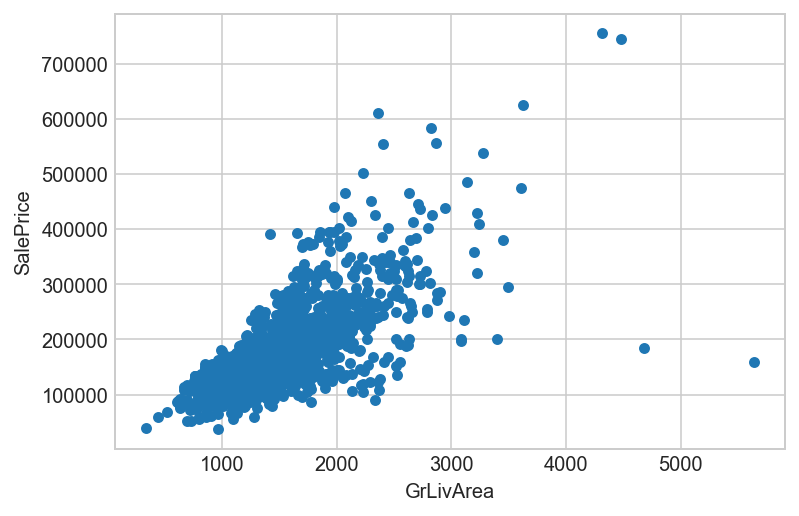

In [351]:
# Plotting SalesPrice and GrLivArea for observing any linear relationship between them
df.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

There are 2 large GrLivArea in the bottom of the plot which are in low price,can be considered as outliers.So,as per data 
dictionary we can delete them as they are more than 4000 sqft and are less than the price of 250000 

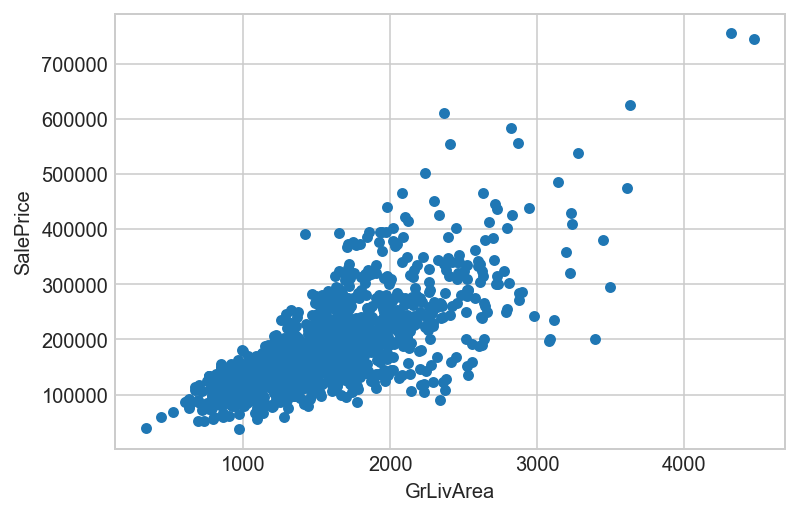

In [352]:
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<250000)].index)

#Once again plotting the graph and checking for the outliers
df.plot.scatter(x = 'GrLivArea', y = 'SalePrice')

Removing outliers is note a good way always but here it is necessary as houses which are greater than 4000 sqft cannot be 
considered as residential.

SalesPrice is our target variable that we have to predict later.So,we can do some analysis on this feature.

In [353]:
df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [354]:
df['SalePrice'].describe()

count      1448.000000
mean     181667.759669
std       79229.096063
min       37900.000000
25%      130000.000000
50%      163945.000000
75%      214125.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


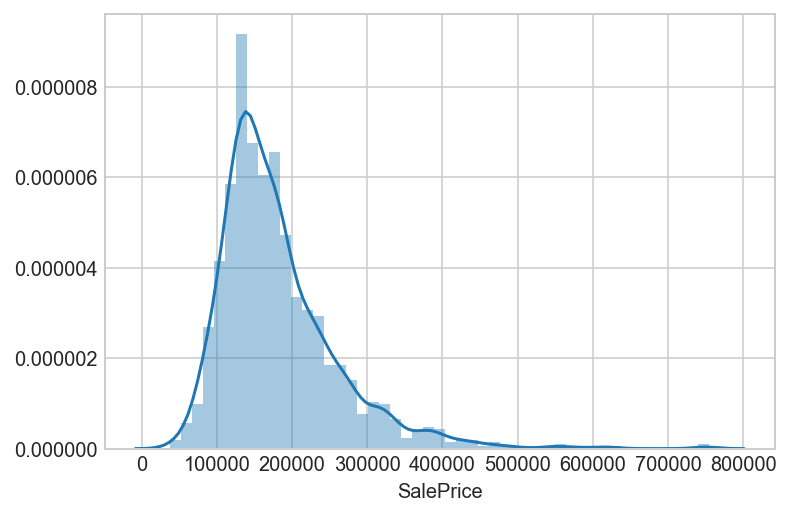

In [355]:
sns.distplot(df['SalePrice'], hist=True)

The target variable is positively skewed. As models prefer normally distributed data , we need to transform this variable and 
make it more normally distributed.

C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


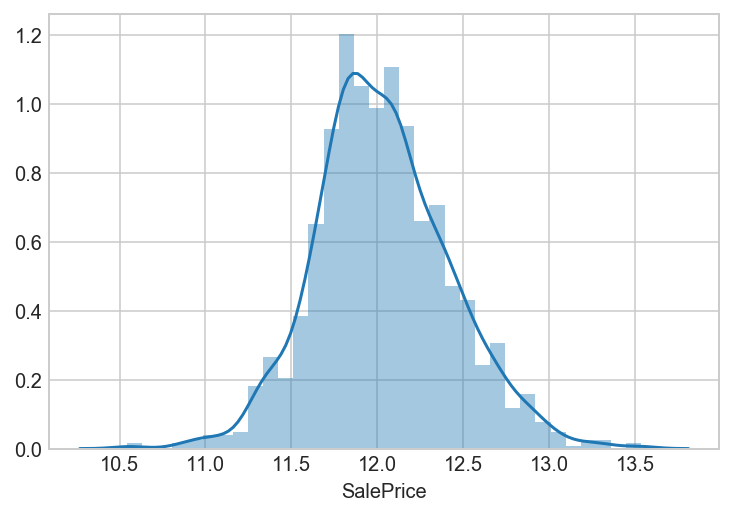

In [356]:
# We can do a log transformation on our data with the help of numpy log functionality as shown below as: log_data = np.log(data)
df['SalePrice'] = np.log(df['SalePrice'])
y = df.SalePrice

# Checking the new distribution 
sns.distplot(df['SalePrice'] , hist=True)

So,the data appears more like normally distributed

In [357]:
# calculate the baseline accuracy:
(y.value_counts()/y.sum()).describe()

count    656.000000
mean       0.000127
std        0.000133
min        0.000057
25%        0.000057
50%        0.000057
75%        0.000172
max        0.001148
Name: SalePrice, dtype: float64

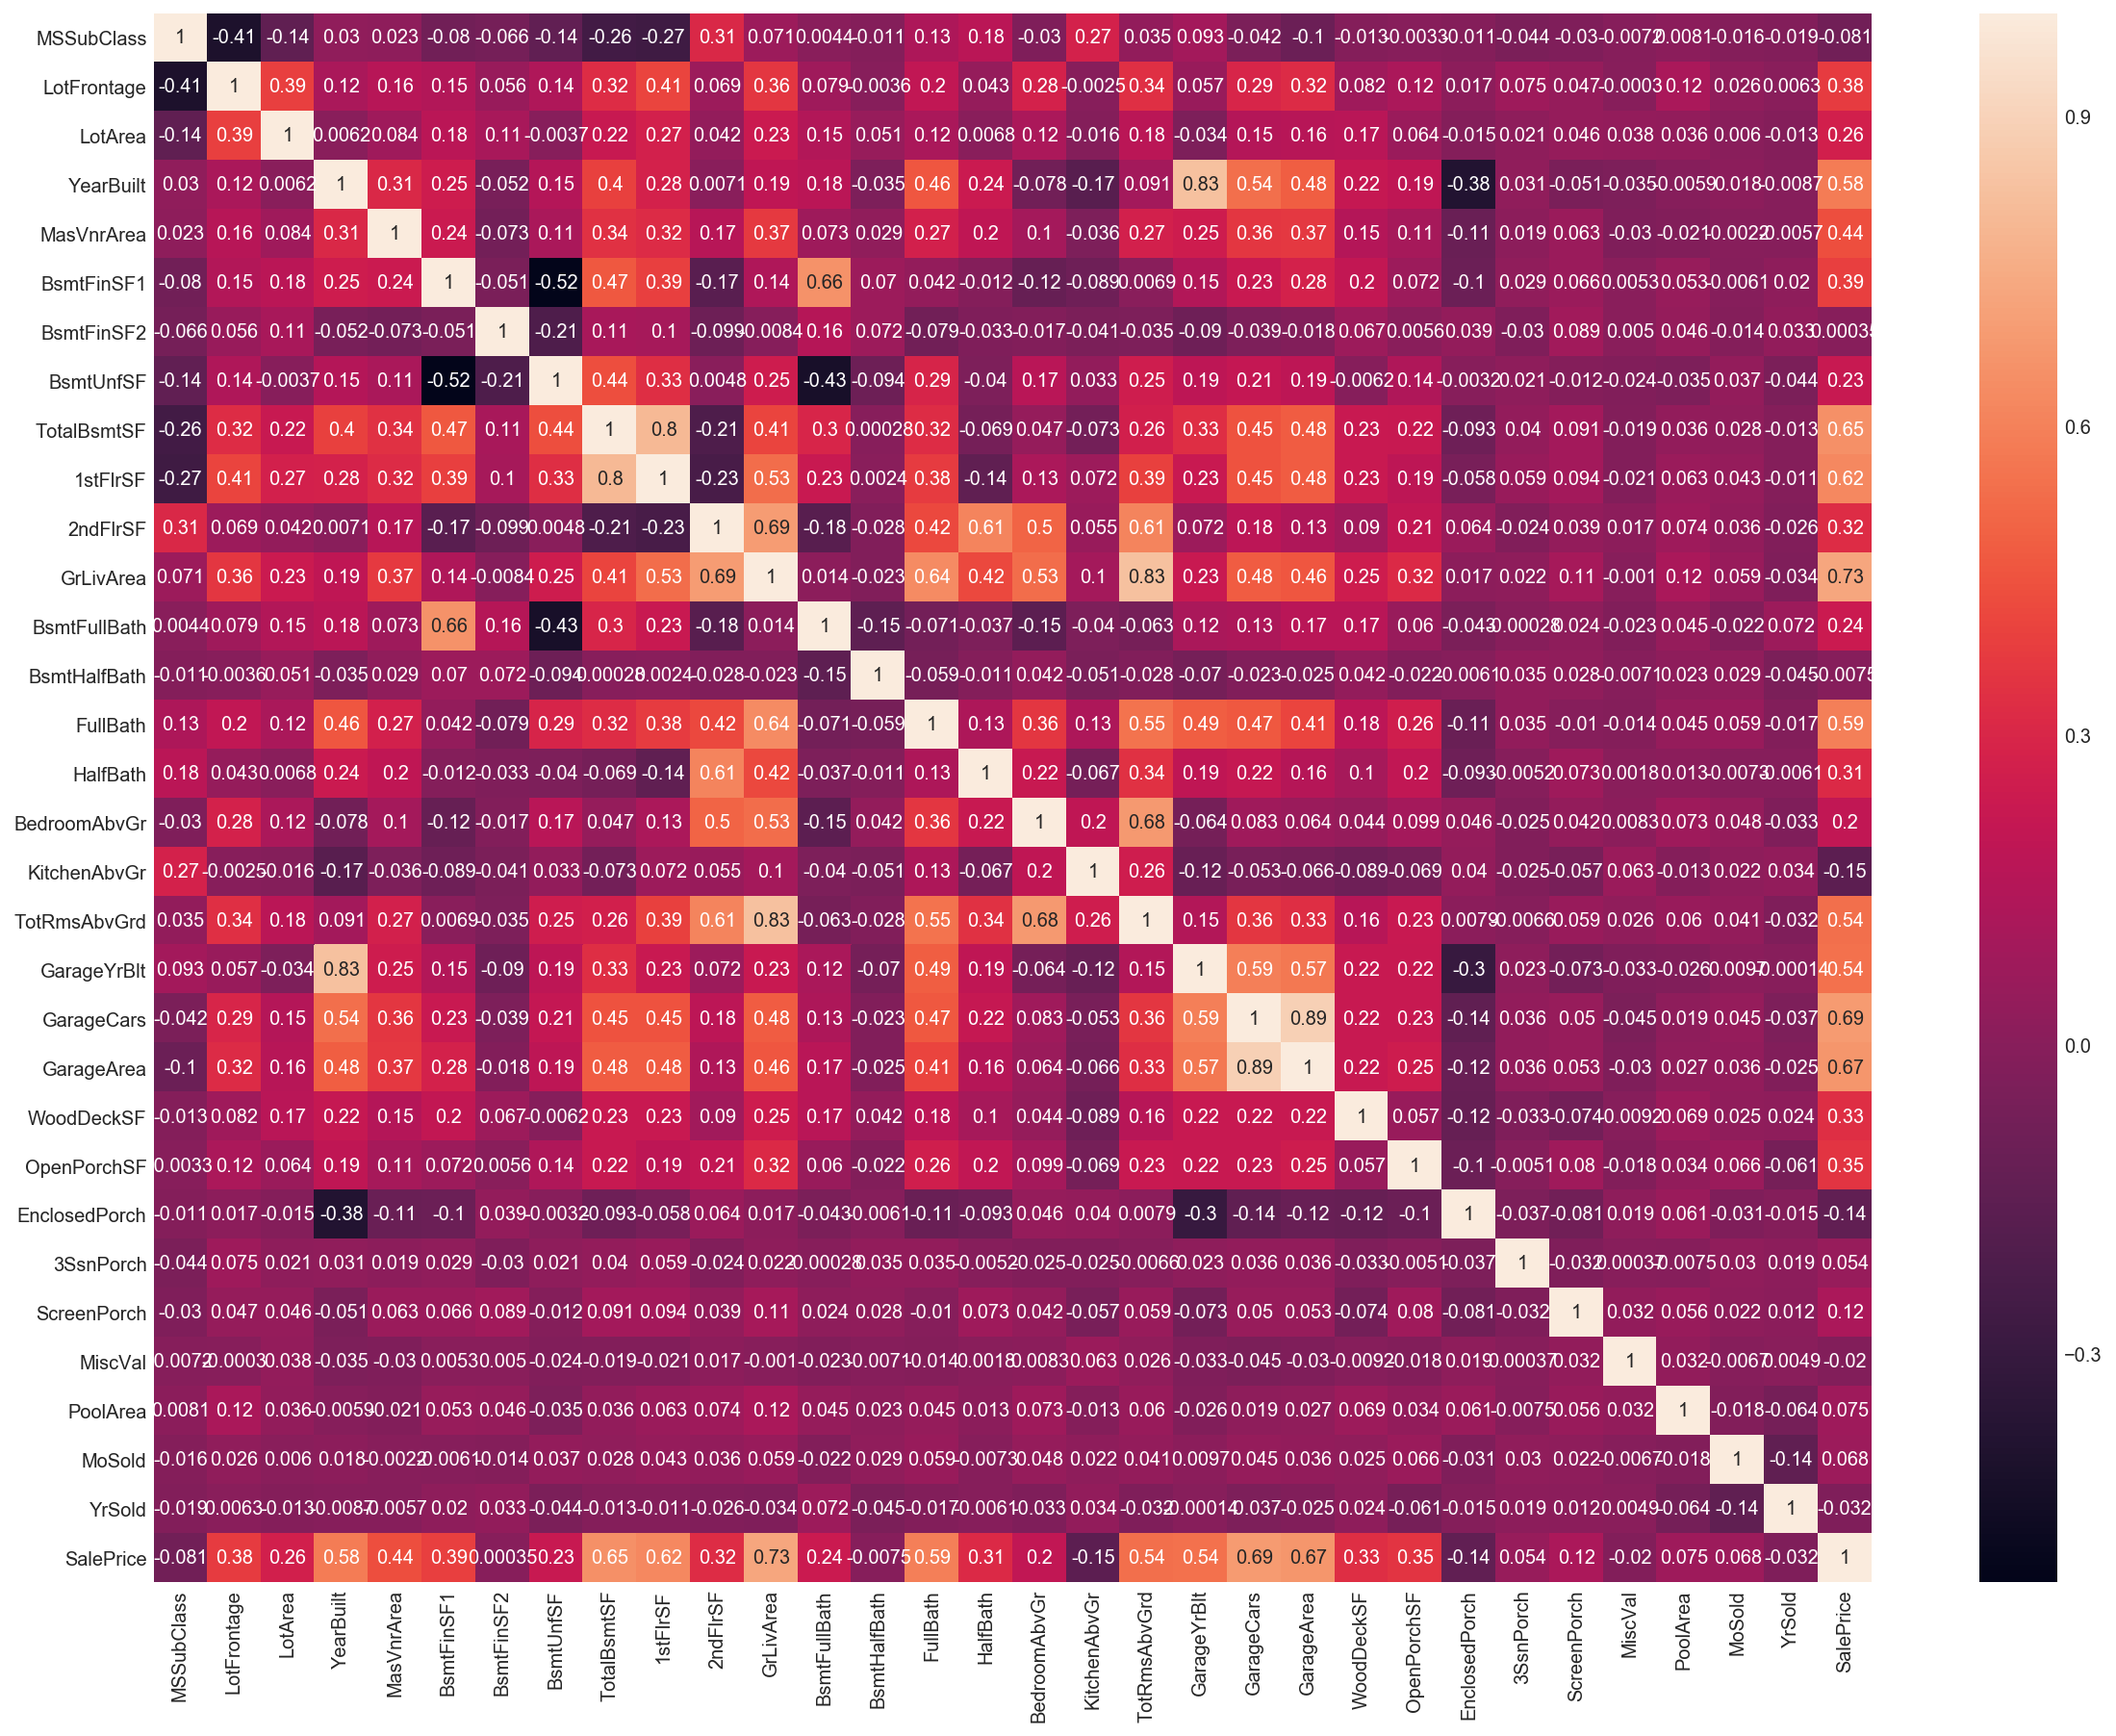

In [358]:
# Now,we have to determine any features which are highly corelated with some other features.For that,we are using heatmap
plt.figure(figsize=(20,15))
corr = df.corr()
sns.heatmap(corr, annot=True)

In [359]:
#According to heatmap,the pairs 'GrLivArea' - 'TotRmsAbvGrd', 'GarageArea' - 'GarageCars', '1stFlrSF' - 'TotalBsmtSF' and 
#'GrLivArea' - '2ndFlrSF' shows linear relationship with eachother.Since,our target variable is the SalePrice,it is important to 
#check the relationship between the target variable and these features.So,from this heatmap it is clear that 'GrLivArea', 
#'GarageCars', 'TotalBsmtSF' are correlated with the SalePrice.So,we can drop the other features like 'TotRmsAbvGrd', 'GarageArea',
#'1stFlrSF' and '2ndFlrSF'.

In [360]:
# Dropping unwanted columns
#df.drop(['TotRmsAbvGrd','GarageArea','1stFlrSF','2ndFlrSF'], axis=1, inplace=True)

In [361]:
# Categorical variables
#n = house.select_dtypes(include=object)
#for c in n.columns:
 #   categorical_var = c
  #  print(categorical_var)

In [362]:
# Extracting Categorical variables
#categorical_vars = ['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
                #    'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                 #   'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                  #  'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
                   # 'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType',
                    #'SaleCondition']

In [363]:
#convert categorical variable into dummy in the entire dataframe
#df = pd.get_dummies(df)

In [364]:
#df.shape

In [365]:
#df.columns

In [366]:
print("The most important features relative to target")
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)
#this you can see at the time of heatmap also.

The most important features relative to target
SalePrice        1.000000
GrLivArea        0.729575
GarageCars       0.688030
GarageArea       0.669035
TotalBsmtSF      0.650343
1stFlrSF         0.620220
FullBath         0.592466
YearBuilt        0.583285
GarageYrBlt      0.544176
TotRmsAbvGrd     0.539489
MasVnrArea       0.435962
BsmtFinSF1       0.391893
LotFrontage      0.380769
OpenPorchSF      0.353404
WoodDeckSF       0.331330
2ndFlrSF         0.323074
HalfBath         0.311516
LotArea          0.264702
BsmtFullBath     0.235325
BsmtUnfSF        0.226622
BedroomAbvGr     0.199466
ScreenPorch      0.120535
PoolArea         0.075033
MoSold           0.068479
3SsnPorch        0.054319
BsmtFinSF2       0.000349
BsmtHalfBath    -0.007490
MiscVal         -0.020235
YrSold          -0.031984
MSSubClass      -0.081345
EnclosedPorch   -0.136882
KitchenAbvGr    -0.153540
Name: SalePrice, dtype: float64


In [367]:
# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'Alley', 'MiscFeature', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'MasVnrType',
       'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [368]:
# Numerical features
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'PoolArea',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [369]:
# Differentiate numerical features (dropping the target) and categorical features
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("SalePrice")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
df_num = df[numerical_features]
df_cat = df[categorical_features]

Numerical features : 31
Categorical features : 25


In [370]:
# Now,we simply used median() to fill na values in numerical features
print("NAs for numerical features in the dataframe : " + str(df_num.isnull().values.sum()))
df_num = df_num.fillna(df_num.median())
print("Remaining NAs for numerical features in the dataframe : " + str(df_num.isnull().values.sum()))

NAs for numerical features in the dataframe : 346
Remaining NAs for numerical features in the dataframe : 0


In [371]:
df_cat.shape 

(1448, 25)

In [372]:
# Create dummy features for categorical values
df_cat = pd.get_dummies(df_cat)
df_cat.shape

(1448, 145)

In [373]:
df_cat.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [374]:
str(df_cat.isnull().values.sum())

'0'

In [375]:
df_num.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
YearBuilt        0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MiscVal          0
PoolArea         0
MoSold           0
YrSold           0
dtype: int64

In [376]:
# Earlier we split the dataset into categorical and numerical features.Now after preprocessing we'll join them to get the whole 
# dataset back.
df_new = pd.concat([df_cat,df_num],axis=1)
df_new.shape

(1448, 176)

In [377]:
df_new.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Grvl', 'Street_Pave', 'LotShape_IR1', 'LotShape_IR2',
       'LotShape_IR3', 'LotShape_Reg',
       ...
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal', 'PoolArea', 'MoSold', 'YrSold'],
      dtype='object', length=176)

# Modelling

Now we are going to use regularized linear regression models from the scikit learn module. I'm going to try both L1(Lasso) and 
L2(Ridge) regularization. I'll also define a function that returns the cross-validation rms error so we can evaluate our models
and pick the best tuning par

Regularization is a very useful method to handle collinearity, filter out noise from data, and eventually prevent overfitting.
The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.

In [378]:
X_train = df_new
y_train = df['SalePrice']

In [379]:
#y = df["SalePrice"]
#X = df_new.iloc[:,1:]

In [380]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X_train)

In [381]:
Xs.shape

(1448, 176)

In [382]:
from sklearn.cross_validation import train_test_split
df_new.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [383]:
X_train = Xs[df_new.YrSold.isin([2006, 2007, 2008, 2009])]
X_test = Xs[df_new.YrSold == 2010]

y_train = y[df_new.YrSold.isin([2006, 2007, 2008, 2009])]
y_test = y[df_new.YrSold == 2010]

# test size can have random size

In [384]:
len(X_train)

1276

In [385]:
X_train.shape

(1276, 176)

In [386]:
#from sklearn.cross_validation import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

In [387]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1276, 176), (172, 176), (1276,), (172,))

In [388]:
X_train

array([[-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
        -1.60127087,  0.14107867],
       [-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
        -0.48761082, -0.61272912],
       [-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
         0.99726924,  0.14107867],
       ...,
       [ 4.61269152, -0.10570328, -1.96030849, ..., -0.06392919,
         1.36848926,  0.89488645],
       [-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
         0.62604923, -0.61272912],
       [-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
        -0.11639081,  0.14107867]])

In [389]:
#from sklearn.preprocessing import StandardScaler

#ss = StandardScaler()
#Xs = ss.fit_transform(X_train)

In [390]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, make_scorer

In [391]:
#from sklearn.linear_model import LinearRegression

#linreg = LinearRegression()
#linreg.fit(X_train, y_train)

In [392]:
#print(linreg.score(X_train, y_train))

In [393]:
#print(linreg.score(X_test, y_test))

In [394]:
#from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 5-fold cross validation
#scores = cross_val_score(linreg, X_train, y_train, cv=5)
#print("Cross-validated scores:", scores)

# Make cross validated predictions on the test sets
#predictions = cross_val_predict(linreg, X_test, y_test, cv=5)
#plt.scatter(y_test, predictions)

# manually calcualte the r2
#r2 = metrics.r2_score(y_test, predictions)
#print("Cross-Predicted R2:", r2)

In [395]:
#linreg = LinearRegression()

#linreg_scores = cross_val_score(linreg, Xs, y_train, cv=10)

#print(linreg_scores)
#print(np.mean(linreg_scores))

In [396]:
# ref https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

In [397]:
# Define error measure for official scoring : RMSE
#scorer = make_scorer(mean_squared_error, greater_is_better = False)

#def rmse_cv_train(model):
   # rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    #return(rmse)

#def rmse_cv_test(model):
 #   rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
  #  return(rmse)

# Linear Regression without regularization

In [398]:
# Linear Regression
#lr = LinearRegression()
#lr.fit(X_train, y_train)

# Look at predictions on training and test set
#print("RMSE on Training set :", rmse_cv_train(lr).mean())
#y_train_pred = lr.predict(X_train)
#y_test_pred = lr.predict(X_test)

# Plot residuals
#plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
#plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
#plt.title("Linear regression")
#plt.xlabel("Predicted values")
#plt.ylabel("Residuals")
#plt.legend(loc = "upper left")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
#plt.show()

# Plot predictions
#plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
#plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
#plt.title("Linear regression")
#plt.xlabel("Predicted values")
#plt.ylabel("Real values")
#plt.legend(loc = "upper left")
#plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
#plt.show()

In [399]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [400]:
lm.score(X_train,y_train)

0.9147517505406471

In [401]:
lm.score(X_test,y_test)

0.8929178682242751

In [402]:
y_pred = lm.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
rmse

0.12882675495869553

In [403]:
# As per instructions, evaluate model's performance on the test (2010) data
# Make predictions on the test (2010) set

#y_pred = lm.predict(X_test)

In [404]:
# Calculate R2 for test (2010)
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.8929178682242751


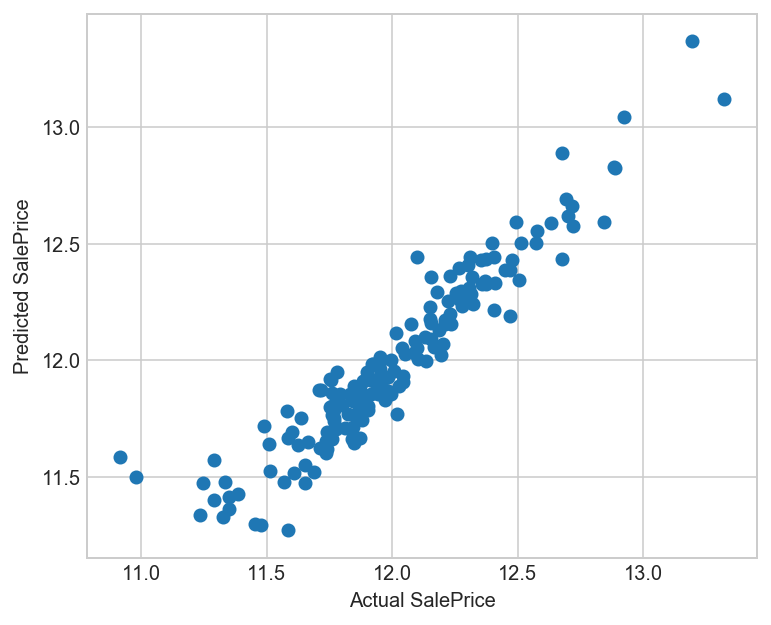

In [405]:
#Plot the predictive values vs actual values for test (2010)
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice",)
plt.show()

C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


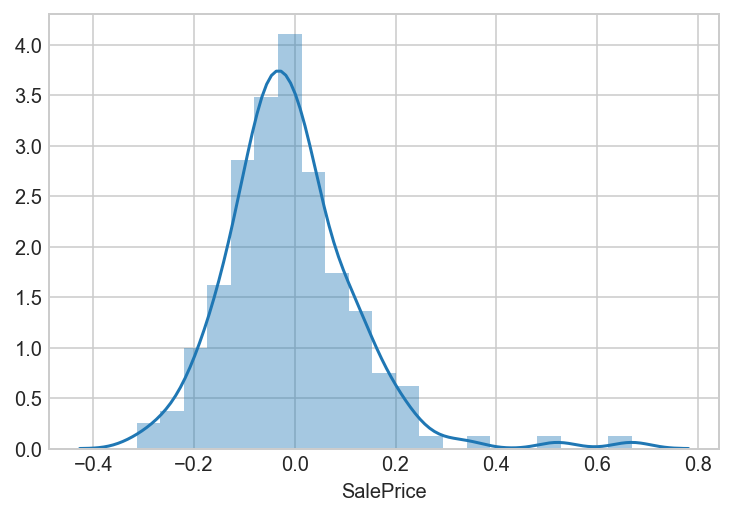

In [406]:
# Plot the distibution of residuals
residual_test = y_pred-y_test
sns.distplot(residual_test)

In [407]:
# Find the best predictors by examining coefficients of Linear Regression on test
lm_train_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lm.coef_,
                            'abs_coef':np.abs(lm.coef_)})

lm_train_coefs.sort_values('abs_coef', inplace=True, ascending=False)

In [408]:
# Based on the above results, the model on train dataset has performed with a r2 score of 0.89, using Linear Regression. The top 10 predictors with the highest coefficient are the following variables:
lm_train_coefs.head(10)

,abs_coef,coef,variable
42,1.233964e+12,1.233964e+12,Neighborhood_NAmes
13,1.086841e+12,1.086841e+12,LandContour_Lvl
35,1.037961e+12,1.037961e+12,Neighborhood_CollgCr
66,9.660376e+11,-9.660376e+11,Condition2_Norm
57,9.571109e+11,-9.571109e+11,Condition1_Norm
47,9.099345e+11,9.099345e+11,Neighborhood_OldTown
37,8.556139e+11,8.556139e+11,Neighborhood_Edwards
27,8.187051e+11,-8.187051e+11,LandSlope_Gtl
51,8.050738e+11,8.050738e+11,Neighborhood_Somerst
38,7.735941e+11,7.735941e+11,Neighborhood_Gilbert


# Linear Regression with Ridge regularization (L2 penalty)

In [409]:
# 2* Ridge
#ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
#ridge.fit(X_train, y_train)
#alpha = ridge.alpha_
#print("Best alpha :", alpha)

#print("Try again for more precision with alphas centered around " + str(alpha))
#ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
 #                         alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
  #                        alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
   #             cv = 10)
#ridge.fit(X_train, y_train)
#alpha = ridge.alpha_
#print("Best alpha :", alpha)

#print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
#print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
#y_train_rdg = ridge.predict(X_train)
#y_test_rdg = ridge.predict(X_test)

# Plot residuals
#plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
#plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
#plt.title("Linear regression with Ridge regularization")
#plt.xlabel("Predicted values")
#plt.ylabel("Residuals")
#plt.legend(loc = "upper left")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
#plt.show()

# Plot predictions
#plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
#plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
#plt.title("Linear regression with Ridge regularization")
#plt.xlabel("Predicted values")
#plt.ylabel("Real values")
#plt.legend(loc = "upper left")
#plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
#plt.show()

# Plot important coefficients
#coefs = pd.Series(ridge.coef_, index = X_train.columns)
#print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
 #     str(sum(coefs == 0)) + " features")
#imp_coefs = pd.concat([coefs.sort_values().head(10),
 #                    coefs.sort_values().tail(10)])
#imp_coefs.plot(kind = "barh")
#plt.title("Coefficients in the Ridge Model")
#plt.show()

In [410]:
rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)
rdgCV.fit(X_train,y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [411]:
print(rdgCV.alpha_)

100


In [412]:
rdg = Ridge(alpha=10)
rdg.fit(X_train, y_train)
rdg.score(X_train, y_train)

0.9151439350447327

In [413]:
rdg.score(X_test, y_test)

0.9041272083927819

In [414]:
y_pred = rdg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
rmse

0.12189762660103456

In [415]:
# Calculate R2 for test (2010)
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.9041272083927819


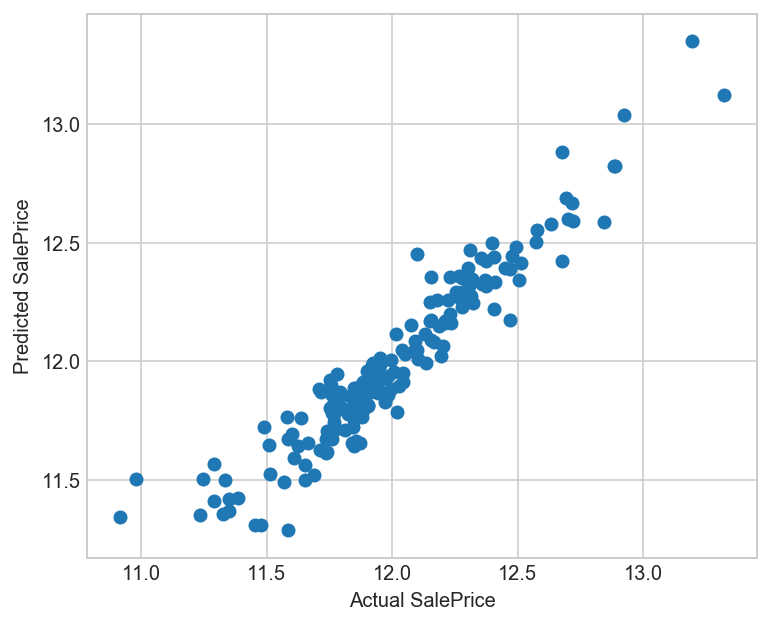

In [416]:
#Plot the predictive values vs actual values for test (2010)
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice",)
plt.show()

C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


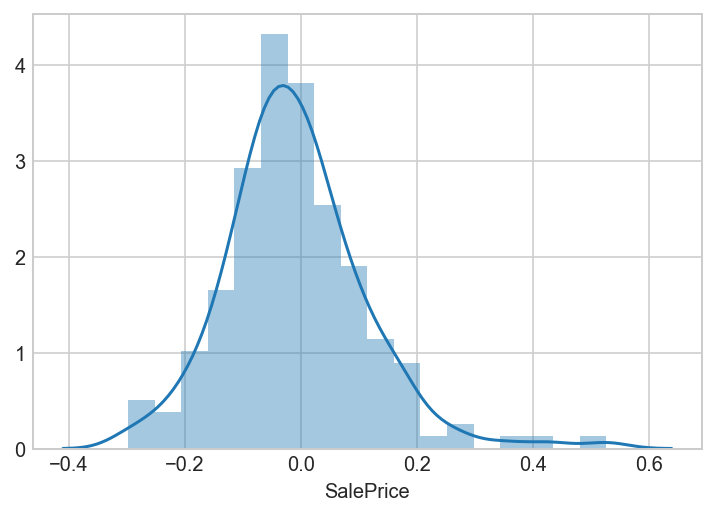

In [417]:
# Plot the distibution of residuals
residual_test = y_pred-y_test
sns.distplot(residual_test)

In [418]:
# Find the best predictors by examining coefficients of RidgeCV on test
rdg_train_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':rdg.coef_,
                            'abs_coef':np.abs(rdg.coef_)})

rdg_train_coefs.sort_values('abs_coef', inplace=True, ascending=False)

In [419]:
# Based on the above results, the model on train dataset has performed with a r2 score of 0.90, using RidgeCV. The top 10 predictors with the highest coefficient are the following variables:
rdg_train_coefs.head(10)

,abs_coef,coef,variable
156,0.091551,0.091551,GrLivArea
154,0.064348,0.064348,1stFlrSF
155,0.060253,0.060253,2ndFlrSF
148,0.059447,0.059447,YearBuilt
153,0.032573,0.032573,TotalBsmtSF
172,0.031905,0.031905,MiscVal
23,0.030003,-0.030003,MiscFeature_Gar2
36,0.027980,0.027980,Neighborhood_Crawfor
46,0.027711,0.027711,Neighborhood_NridgHt
165,0.026939,0.026939,GarageCars


# Linear Regression with Lasso regularization (L1 penalty)

In [420]:
# 3* Lasso
#lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
 #                         0.3, 0.6, 1], 
   #             max_iter = 50000, cv = 10)
#lasso.fit(X_train, y_train)
#alpha = lasso.alpha_
#print("Best alpha :", alpha)

#print("Try again for more precision with alphas centered around " + str(alpha))
#lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
 #                         alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
  #                        alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
   #                       alpha * 1.4], 
    #            max_iter = 50000, cv = 10)
#lasso.fit(X_train, y_train)
#alpha = lasso.alpha_
#print("Best alpha :", alpha)

#print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
#print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
#y_train_las = lasso.predict(X_train)
#y_test_las = lasso.predict(X_test)

# Plot residuals
#plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
#plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
#plt.title("Linear regression with Lasso regularization")
#plt.xlabel("Predicted values")
#plt.ylabel("Residuals")
#plt.legend(loc = "upper left")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
#plt.show()

# Plot predictions
#plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
#plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
#plt.title("Linear regression with Lasso regularization")
#plt.xlabel("Predicted values")
#plt.ylabel("Real values")
#plt.legend(loc = "upper left")
#plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
#plt.show()

# Plot important coefficients
#coefs = pd.Series(lasso.coef_, index = X_train.columns)
#print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
 #     str(sum(coefs == 0)) + " features")
#imp_coefs = pd.concat([coefs.sort_values().head(10),
 #                    coefs.sort_values().tail(10)])
#imp_coefs.plot(kind = "barh")
#plt.title("Coefficients in the Lasso Model")
#plt.show()

In [421]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)

LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [422]:
print(lasso.alpha_)

0.003


In [423]:
las = Lasso(alpha=0.0006)
las.fit(X_train, y_train)
las.score(X_train, y_train)

0.9141942491794712

In [424]:
las.score(X_test, y_test)

0.9102389342845009

In [425]:
y_pred = las.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
rmse

0.11794826674339295

In [426]:
# Calculate R2 for test (2010)
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.910238934284501


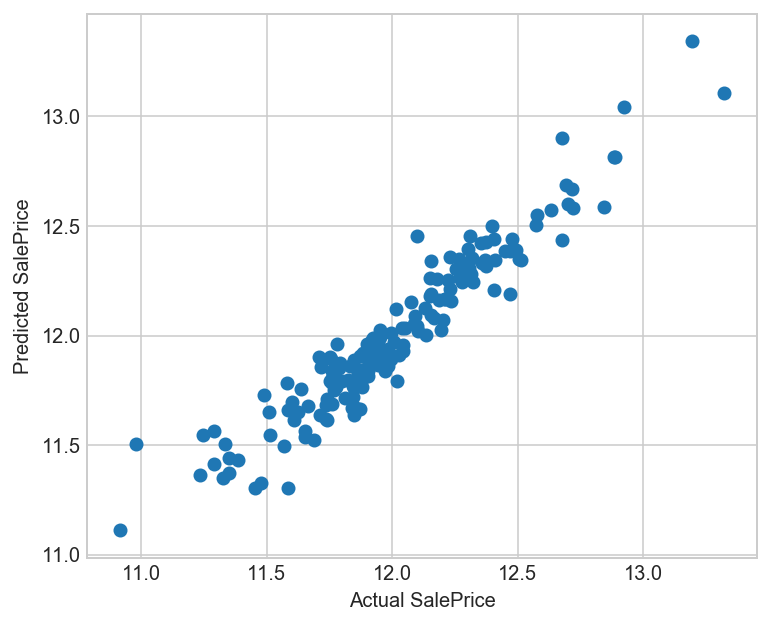

In [427]:
#Plot the predictive values vs actual values for test (2010)
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice",)
plt.show()

C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


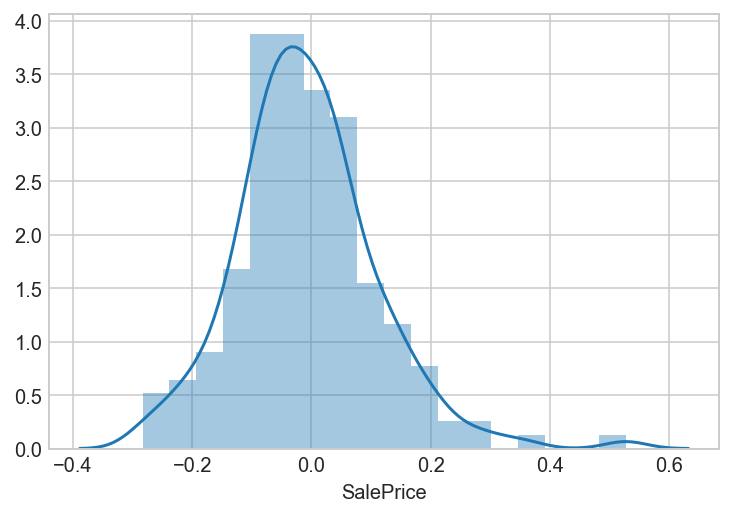

In [428]:
# Plot the distibution of residuals
residual_test = y_pred-y_test
sns.distplot(residual_test)

In [429]:
# Find the best predictors by examining coefficients of LassoCV on test
las_train_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':las.coef_,
                            'abs_coef':np.abs(las.coef_)})

las_train_coefs.sort_values('abs_coef', inplace=True, ascending=False)

In [430]:
# Based on the above results, the model on train dataset has performed with a r2 score of 0.91, using LassoCV. The top 10 predictors with the highest coefficient are the following variables:
las_train_coefs.head(10)

,abs_coef,coef,variable
156,0.153967,0.153967,GrLivArea
148,0.065441,0.065441,YearBuilt
153,0.036261,0.036261,TotalBsmtSF
36,0.030848,0.030848,Neighborhood_Crawfor
165,0.030754,0.030754,GarageCars
117,0.028592,0.028592,Functional_Typ
46,0.028059,0.028059,Neighborhood_NridgHt
147,0.025136,0.025136,LotArea
154,0.023688,0.023688,1stFlrSF
162,0.021798,-0.021798,KitchenAbvGr


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [431]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [432]:
house = house.drop(house[(house['GrLivArea']>4000) & (house['SalePrice']<250000)].index)

In [433]:
# According to the estimate of the price and whether the house can be renovated or not,we can divide the features into fixed and 
# dynamic
# Here,for the part 2,we are building model with dynamic features only
dynamic_features = ['OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
                    'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
                    'LowQualFinSF', 'KitchenQual','Functional', 'Fireplaces', 'FireplaceQu','GarageQual','GarageCond', 'PoolQC',
                    'Fence','YrSold']

# We can put these fixed features in our dataframe
df1 = house[dynamic_features]
df1.shape

(1448, 25)

In [434]:
# Our Target variable
y = df1.YearRemodAdd

In [435]:
# calculate the baseline accuracy:
(y.value_counts()/y.sum()).describe()

count    61.000000
mean      0.000008
std       0.000009
min       0.000001
25%       0.000003
50%       0.000005
75%       0.000009
max       0.000059
Name: YearRemodAdd, dtype: float64

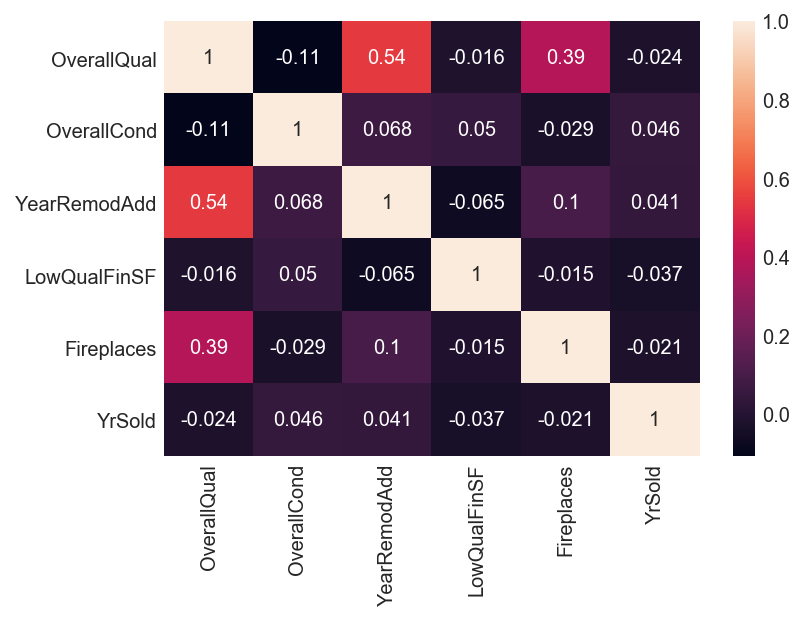

In [436]:
# Now,we have to determine any features which are highly corelated with some other features.For that,we are using heatmap
corr = df1.corr()
sns.heatmap(corr, annot=True)

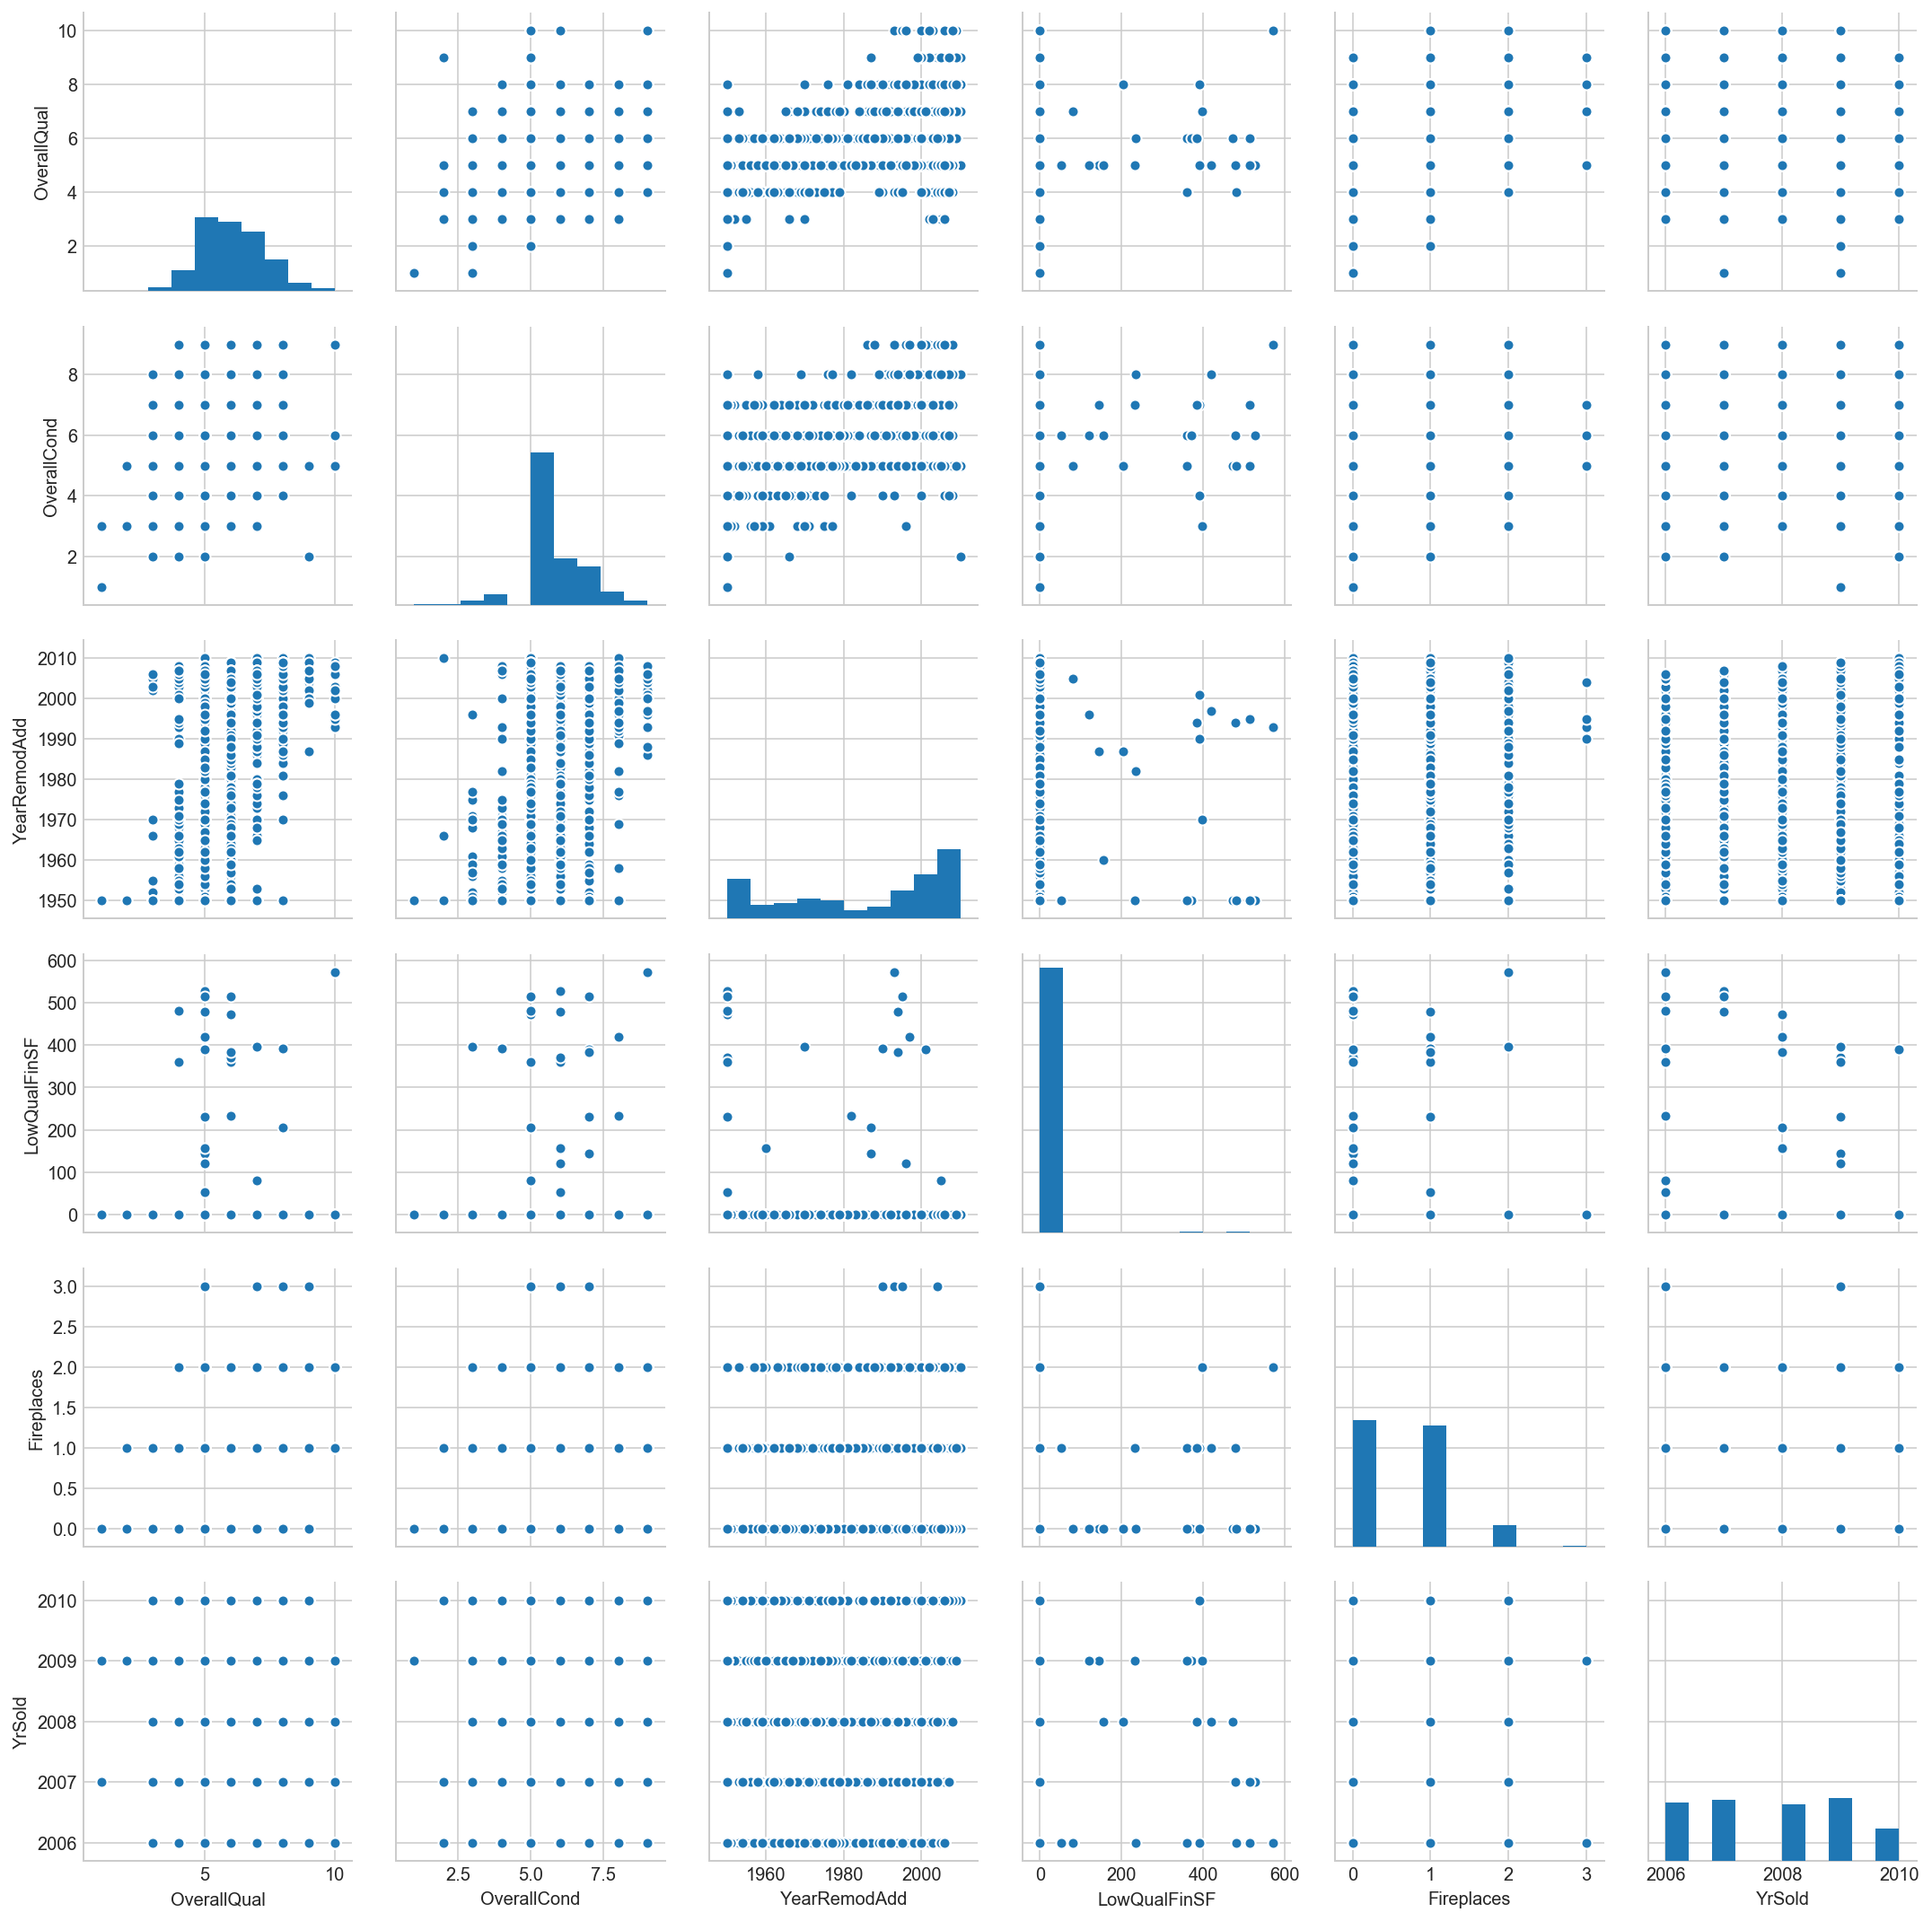

In [437]:
# Using pairplot
sns.pairplot(df1)

In [438]:
print("The most important features relative to target")
corr = df1.corr()
corr.sort_values(["YearRemodAdd"], ascending = False, inplace = True)
print(corr.YearRemodAdd)
#this you can see at the time of heatmap and pairplot also.

The most important features relative to target
YearRemodAdd    1.000000
OverallQual     0.543968
Fireplaces      0.101842
OverallCond     0.068358
YrSold          0.040824
LowQualFinSF   -0.065287
Name: YearRemodAdd, dtype: float64


In [439]:
# Categorical features
categorical_features_dy = df1.select_dtypes(include=['object']).columns
categorical_features_dy

Index(['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence'],
      dtype='object')

In [440]:
# Numerical features
numerical_features_dy = df1.select_dtypes(exclude = ["object"]).columns
numerical_features_dy

Index(['OverallQual', 'OverallCond', 'YearRemodAdd', 'LowQualFinSF',
       'Fireplaces', 'YrSold'],
      dtype='object')

In [441]:
# Differentiate numerical features (dropping the target) and categorical features
categorical_features_dy = df1.select_dtypes(include = ["object"]).columns
numerical_features_dy = df1.select_dtypes(exclude = ["object"]).columns
numerical_features_dy = numerical_features_dy.drop("YearRemodAdd")
print("Numerical features_dy : " + str(len(numerical_features_dy)))
print("Categorical features_dy : " + str(len(categorical_features_dy)))
df1_numdy = df1[numerical_features_dy]
df1_catdy = df1[categorical_features_dy]

Numerical features_dy : 5
Categorical features_dy : 19


In [442]:
# Now,we simply used median() to fill na values in numerical features
print("NAs for numerical features in the dataframe : " + str(df1_numdy.isnull().values.sum()))
df1_numdy = df1_numdy.fillna(df1_numdy.median())
print("Remaining NAs for numerical features in the dataframe : " + str(df1_numdy.isnull().values.sum()))

NAs for numerical features in the dataframe : 0
Remaining NAs for numerical features in the dataframe : 0


In [443]:
df1_catdy.shape

(1448, 19)

In [444]:
# Create dummy features for categorical values
df1_catdy = pd.get_dummies(df1_catdy)
df1_catdy.shape

(1448, 112)

In [445]:
df1_catdy.head()

,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,...,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [446]:
str(df1_catdy.isnull().values.sum())

'0'

In [447]:
# Earlier we split the dataset into categorical and numerical features.Now after preprocessing we'll join them to get the whole 
# dataset back.
df1_new = pd.concat([df1_catdy,df1_numdy],axis=1)
df1_new.shape

(1448, 117)

# Modelling

In [448]:
from sklearn.cross_validation import train_test_split
X_train = Xs[df1_new.YrSold.isin([2006, 2007, 2008, 2009])]
X_test = Xs[df1_new.YrSold == 2010]

y_train = y[df1_new.YrSold.isin([2006, 2007, 2008, 2009])]
y_test = y[df1_new.YrSold == 2010]

# test size can have random size
#X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.3)

In [449]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1276, 176), (172, 176), (1276,), (172,))

In [450]:
X_train

array([[-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
        -1.60127087,  0.14107867],
       [-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
        -0.48761082, -0.61272912],
       [-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
         0.99726924,  0.14107867],
       ...,
       [ 4.61269152, -0.10570328, -1.96030849, ..., -0.06392919,
         1.36848926,  0.89488645],
       [-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
         0.62604923, -0.61272912],
       [-0.21679317, -0.10570328,  0.51012379, ..., -0.06392919,
        -0.11639081,  0.14107867]])

In [451]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X_train)

In [452]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, make_scorer

# Linear Regression without regularization

In [453]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [454]:
lm.score(X_train,y_train)

0.590571998560427

In [455]:
lm.score(X_test,y_test)

0.3052275030654069

In [456]:
y_pred = lm.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
rmse

16.882487056020064

In [457]:
# Calculate R2 for test (2010)
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.3052275030654069


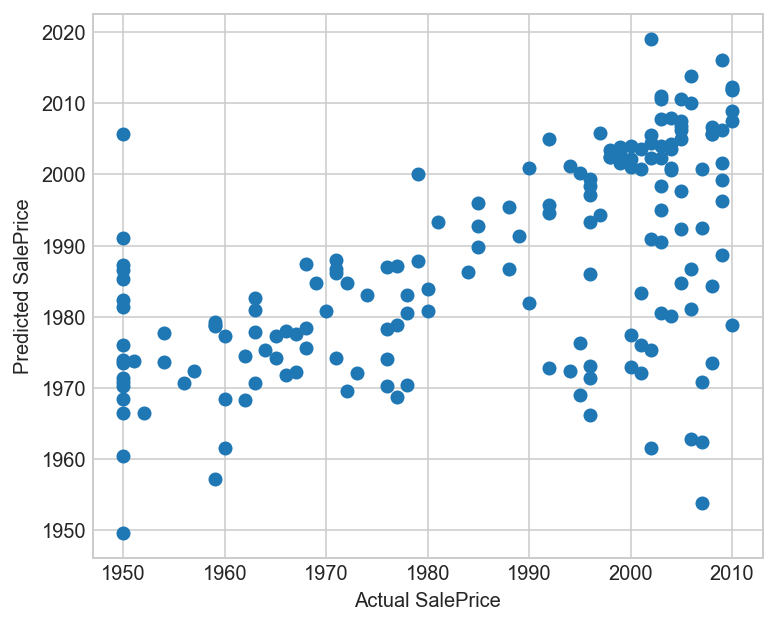

In [458]:
#Plot the predictive values vs actual values for test (2010)
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice",)
plt.show()

C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


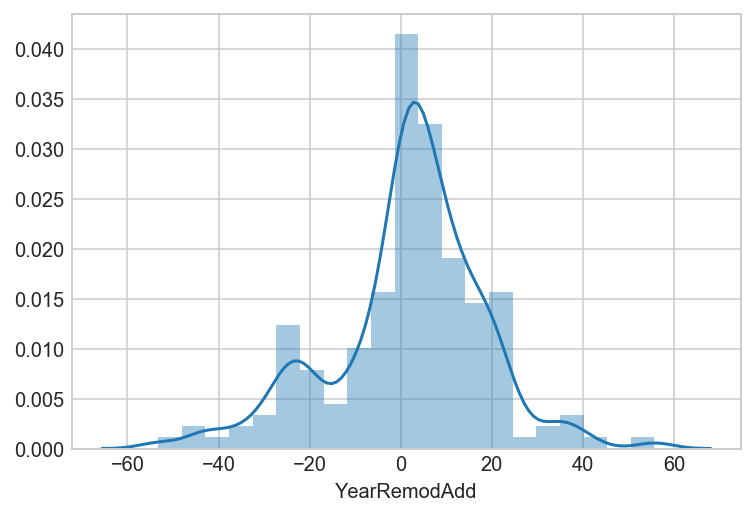

In [459]:
# Plot the distibution of residuals
residual_test = y_pred-y_test
sns.distplot(residual_test)

In [460]:
# Find the best predictors by examining coefficients of Linear Regression on test
lm_train_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lm.coef_,
                            'abs_coef':np.abs(lm.coef_)})

lm_train_coefs.sort_values('abs_coef', inplace=True, ascending=False)

In [461]:
# Based on the above results, the model on train dataset has performed with a r2 score of 0.31, using Linear Regression. The top 10 predictors with the highest coefficient are the following variables:
lm_train_coefs.head(10)

,abs_coef,coef,variable
143,1.075184e+14,1.075184e+14,SaleCondition_Normal
13,1.023752e+14,-1.023752e+14,LandContour_Lvl
144,7.881779e+13,7.881779e+13,SaleCondition_Partial
20,7.454240e+13,7.454240e+13,LotConfig_Inside
9,7.378169e+13,7.378169e+13,LotShape_Reg
6,7.212023e+13,7.212023e+13,LotShape_IR1
66,7.081026e+13,7.081026e+13,Condition2_Norm
139,7.033763e+13,7.033763e+13,SaleCondition_Abnorml
10,6.838985e+13,-6.838985e+13,LandContour_Bnk
16,6.374243e+13,6.374243e+13,LotConfig_Corner


# Linear Regression with Ridge regularization (L2 penalty)

In [462]:
rdgCV = RidgeCV(alphas=[0.01,0.1,1,10,100,1000], cv=5)
rdgCV.fit(X_train,y_train)

RidgeCV(alphas=[0.01, 0.1, 1, 10, 100, 1000], cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [463]:
print(rdgCV.alpha_)

1000


In [464]:
rdg = Ridge(alpha=10)
rdg.fit(X_train, y_train)
rdg.score(X_train, y_train)

0.5881001945941682

In [465]:
rdg.score(X_test, y_test)

0.35121555156713313

In [466]:
y_pred = rdg.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
rmse

16.314183085662158

In [467]:
# Calculate R2 for test (2010)
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.35121555156713313


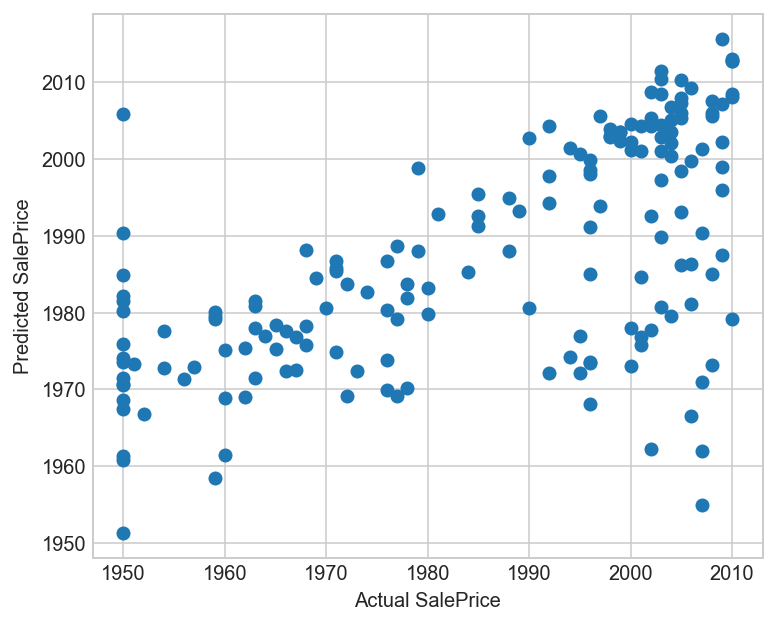

In [468]:
#Plot the predictive values vs actual values for test (2010)
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice",)
plt.show()

C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


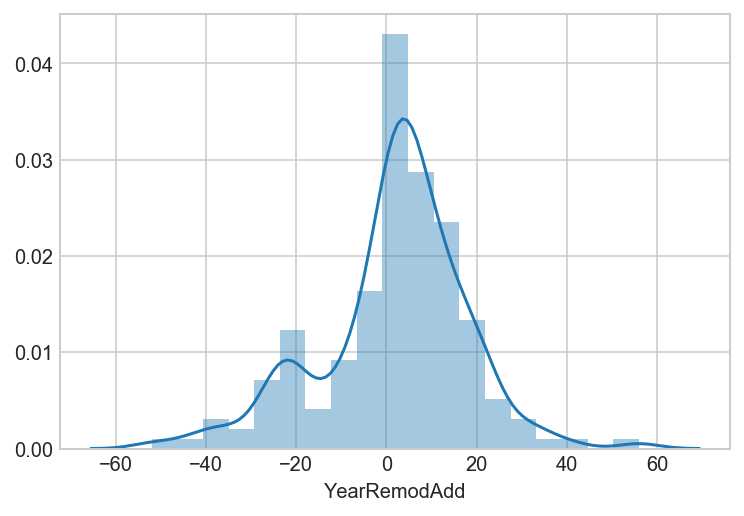

In [469]:
# Plot the distibution of residuals
residual_test = y_pred-y_test
sns.distplot(residual_test)

In [470]:
# Find the best predictors by examining coefficients of RidgeCV on test
rdg_train_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':rdg.coef_,
                            'abs_coef':np.abs(rdg.coef_)})

rdg_train_coefs.sort_values('abs_coef', inplace=True, ascending=False)

In [471]:
# Based on the above results, the model on train dataset has performed with a r2 score of 0.35, using RidgeCV. The top 10 predictors with the highest coefficient are the following variables:
rdg_train_coefs.head(10)

,abs_coef,coef,variable
164,4.657423,4.657423,GarageYrBlt
154,4.267358,4.267358,1stFlrSF
172,3.932758,3.932758,MiscVal
23,3.386289,-3.386289,MiscFeature_Gar2
153,3.240102,-3.240102,TotalBsmtSF
101,3.039528,3.039528,BsmtFinType1_GLQ
148,2.816670,2.816670,YearBuilt
98,2.389057,2.389057,BsmtExposure_No
104,2.258563,2.258563,BsmtFinType1_Unf
150,2.074034,-2.074034,BsmtFinSF1


# Linear Regression with Lasso regularization (L1 penalty)

In [472]:
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(X_train, y_train)

LassoCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1],
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [473]:
print(lasso.alpha_)

0.6


In [474]:
las = Lasso(alpha=0.0006)
las.fit(X_train, y_train)
las.score(X_train, y_train)

C:\Users\sreej\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.5908465512169482

In [475]:
las.score(X_test, y_test)

0.3080028664060639

In [476]:
y_pred = las.predict(X_test)
rmse = np.sqrt(metrics.mean_squared_error(y_pred, y_test))
rmse

16.84873361746341

In [477]:
# Calculate R2 for test (2010)
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
print(r2_test)

0.3080028664060639


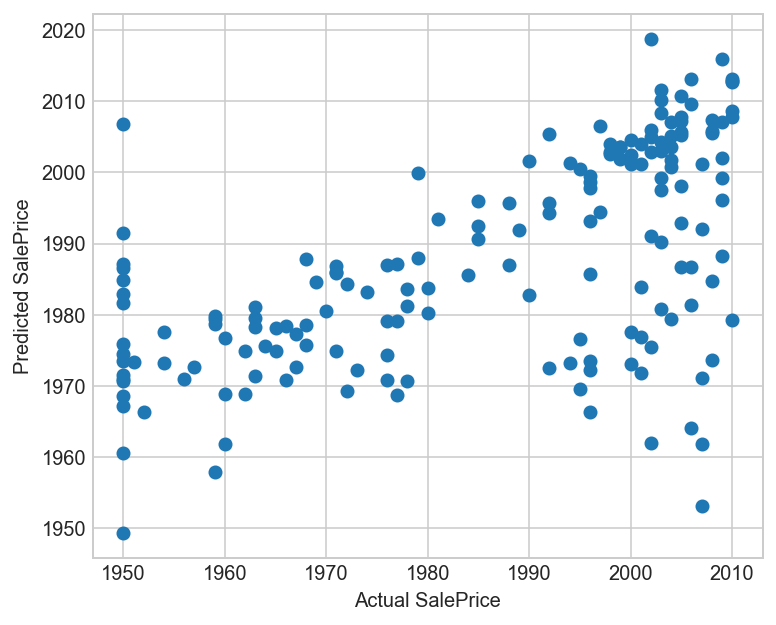

In [478]:
#Plot the predictive values vs actual values for test (2010)
plt.figure(figsize=(6,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice",)
plt.show()

C:\Users\sreej\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


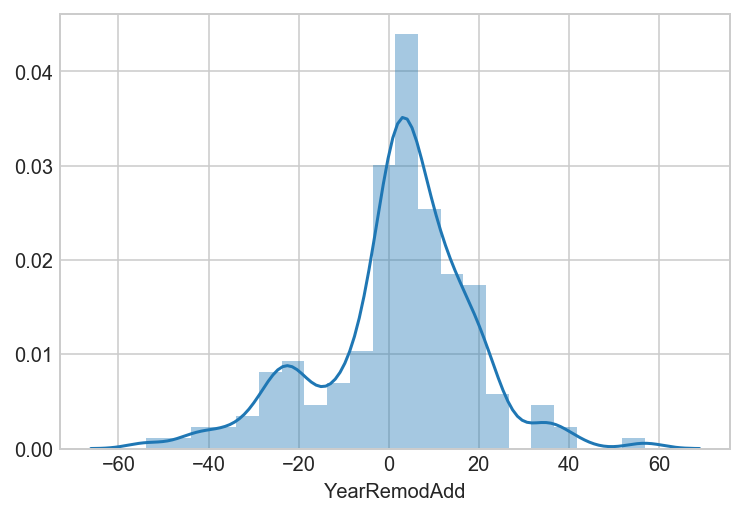

In [479]:
# Plot the distibution of residuals
residual_test = y_pred-y_test
sns.distplot(residual_test)

In [480]:
# Find the best predictors by examining coefficients of LassoCV on test
las_train_coefs = pd.DataFrame({'variable':X.columns,
                            'coef':las.coef_,
                            'abs_coef':np.abs(las.coef_)})

las_train_coefs.sort_values('abs_coef', inplace=True, ascending=False)

In [481]:
# Based on the above results, the model on train dataset has performed with a r2 score of 0.31, using LassoCV. The top 10 predictors with the highest coefficient are the following variables:
las_train_coefs.head(10)

,abs_coef,coef,variable
101,12.743401,12.743401,BsmtFinType1_GLQ
104,11.978152,11.978152,BsmtFinType1_Unf
99,9.440446,9.440446,BsmtFinType1_ALQ
154,8.997240,8.997240,1stFlrSF
23,7.883961,-7.883961,MiscFeature_Gar2
172,7.789371,7.789371,MiscVal
100,6.674755,6.674755,BsmtFinType1_BLQ
103,6.205884,6.205884,BsmtFinType1_Rec
155,5.681457,5.681457,2ndFlrSF
102,5.448295,5.448295,BsmtFinType1_LwQ


# Summary:

When comparing both regression models, the one which performs better is:
    
   Lasso: R^2 score on the training set is 0.914 and on the test set is 0.910
    
   Ridge: R^2 score on the training set is 0.588 and on the test set is 0.351
    
Based on the output, the following appear to be the best predictors of the sale price:
    
   Above grade living area (GrLivArea)

   Total square feet (TotalBsmtSF + 1stFlrSF + 2ndFlrSF)

   Year Built (YearBuilt)

   Size of garage in car capacity (GarageCars)

   Physical locations within Ames city limits (Neighborhood)

   Basement finished square feet (BsmtFinSF1)

   Refers to walkout or garden level walls (BsmtExposure)

   Linear feet of street connected to property (LotFrontage)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [ ]:
# A: